In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
%matplotlib inline

/home/rean/projects/venv/nn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


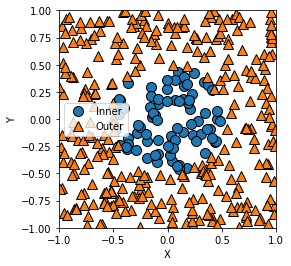

In [19]:
def point_category(x, y):
    return np.sqrt(x * x + y * y) > .5
    
def make_circle(row_cnt, random_state):
    rng = np.random.RandomState(random_state)
    x_result = rng.rand(row_cnt, 2) * 2. - 1.
    y_result = [point_category(it[0], it[1]) for it in x_result]
    return np.array(x_result), np.array(y_result)

X, y = make_circle(400, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Inner", "Outer"], loc='best')
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim(-1, 1)
plt.xlim(-1, 1)
ax = plt.gca()
ax.set_aspect('equal')

Правильность на обучающем наборе: 0.990
Правильность на тестовом наборе: 0.980


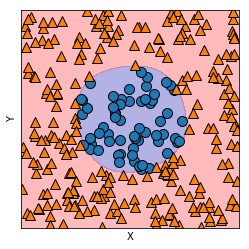

In [20]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', max_iter=1000, alpha=1,
                    hidden_layer_sizes=[100, 100, 100])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-1, 1)
plt.xlim(-1, 1)
ax = plt.gca()
ax.set_aspect('equal')

print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test, y_test)))
